In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from debugpy.launcher.debuggee import describe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [613]:
df = pd.read_csv('day.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [614]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [615]:
# checking null value across column
round((df.isnull().sum(axis=0)/len(df))*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [616]:
# checking null value across rows
round((df.isnull().sum(axis=1)/len(df))*100,2)


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64


#### conclusion - no NA values in rows or columns.

In [617]:
df_duplicate = df.drop_duplicates()
df_duplicate.shape == df.shape

True

#### conclusion - no duplicate rows.

In [618]:
df.columns
#dropping the columns we don't need 'instant', 'casual', 'registered' as we already have the total count and that's our target variable.

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [619]:
df_copy = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'atemp']]

In [620]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [621]:
df_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,atemp
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,18.18125
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,17.68695
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,9.47025
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,10.60610
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,11.46350
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114,11.33210
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095,12.75230
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341,12.12000
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796,11.58500


In [622]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  atemp       730 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [623]:
# we shall create dummy variables for the few of the categorical values 
# 'mnth', 'weekday', 'workingday', 'season', 'holiday' & 'weathersit'
# first step lets convert their data type to 'category'
df_copy['mnth']= df_copy['mnth'].astype('category')
df_copy['weekday']= df_copy['weekday'].astype('category')
df_copy['season']= df_copy['season'].astype('category')
df_copy['weathersit']= df_copy['weathersit'].astype('category')

/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/1811633493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['mnth']= df_copy['mnth'].astype('category')
/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/1811633493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['weekday']= df_copy['weekday'].astype('category')
/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/1811633493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [624]:
# 2nd step creating the dummy variables, it also drops the first column and as well as the original column
df_copy = pd.get_dummies(df_copy, drop_first=True, dtype = int)

In [625]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   atemp         730 non-null    float64
 8   season_2      730 non-null    int64  
 9   season_3      730 non-null    int64  
 10  season_4      730 non-null    int64  
 11  mnth_2        730 non-null    int64  
 12  mnth_3        730 non-null    int64  
 13  mnth_4        730 non-null    int64  
 14  mnth_5        730 non-null    int64  
 15  mnth_6        730 non-null    int64  
 16  mnth_7        730 non-null    int64  
 17  mnth_8        730 non-null    int64  
 18  mnth_9        730 non-null    

In [626]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_copy, train_size = 0.70, test_size = 0.30, random_state = 150)

In [627]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 726 to 442
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   cnt           510 non-null    int64  
 7   atemp         510 non-null    float64
 8   season_2      510 non-null    int64  
 9   season_3      510 non-null    int64  
 10  season_4      510 non-null    int64  
 11  mnth_2        510 non-null    int64  
 12  mnth_3        510 non-null    int64  
 13  mnth_4        510 non-null    int64  
 14  mnth_5        510 non-null    int64  
 15  mnth_6        510 non-null    int64  
 16  mnth_7        510 non-null    int64  
 17  mnth_8        510 non-null    int64  
 18  mnth_9        510 non-null    int

In [628]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 82 to 674
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   cnt           219 non-null    int64  
 7   atemp         219 non-null    float64
 8   season_2      219 non-null    int64  
 9   season_3      219 non-null    int64  
 10  season_4      219 non-null    int64  
 11  mnth_2        219 non-null    int64  
 12  mnth_3        219 non-null    int64  
 13  mnth_4        219 non-null    int64  
 14  mnth_5        219 non-null    int64  
 15  mnth_6        219 non-null    int64  
 16  mnth_7        219 non-null    int64  
 17  mnth_8        219 non-null    int64  
 18  mnth_9        219 non-null    int6

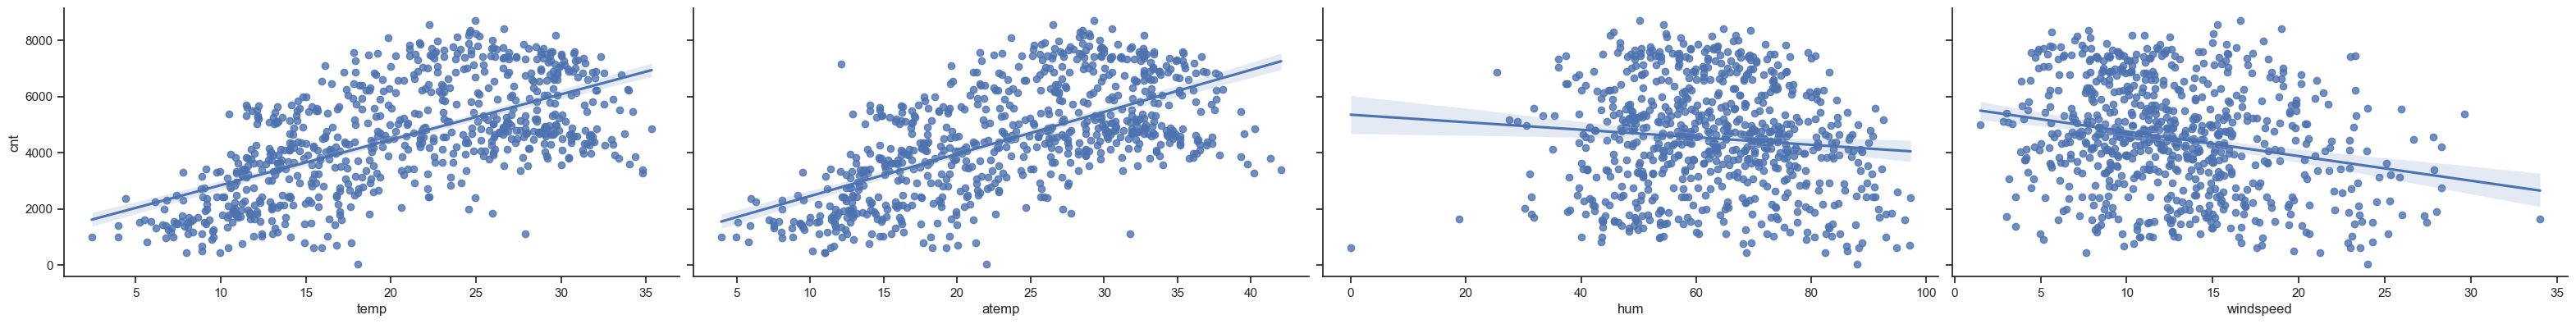

In [629]:
 # visualising and EDA on train data set
sns.pairplot(df_copy, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt', height=4, aspect=2, kind='reg')
sns.set_theme(style="ticks", color_codes=True)

#### so the above plots does show some linear relations between temp, atemp and count.

/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/3300769907.py:5: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(x = 'season', hue = 'season', y = 'cnt', data = df, palette=palette, legend=True)
/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/3300769907.py:7: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'mnth', hue = 'mnth', y = 'cnt', data = df, palette=palette, legend=True)
/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/3300769907.py:9: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(x = 'weathersit', hue = 'weathersit', y = 'cnt', data = df, palette=palette, legend=True)
/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1426/3300769907.py:11: UserWarning: The palette list has more values (7) than needed (2), 

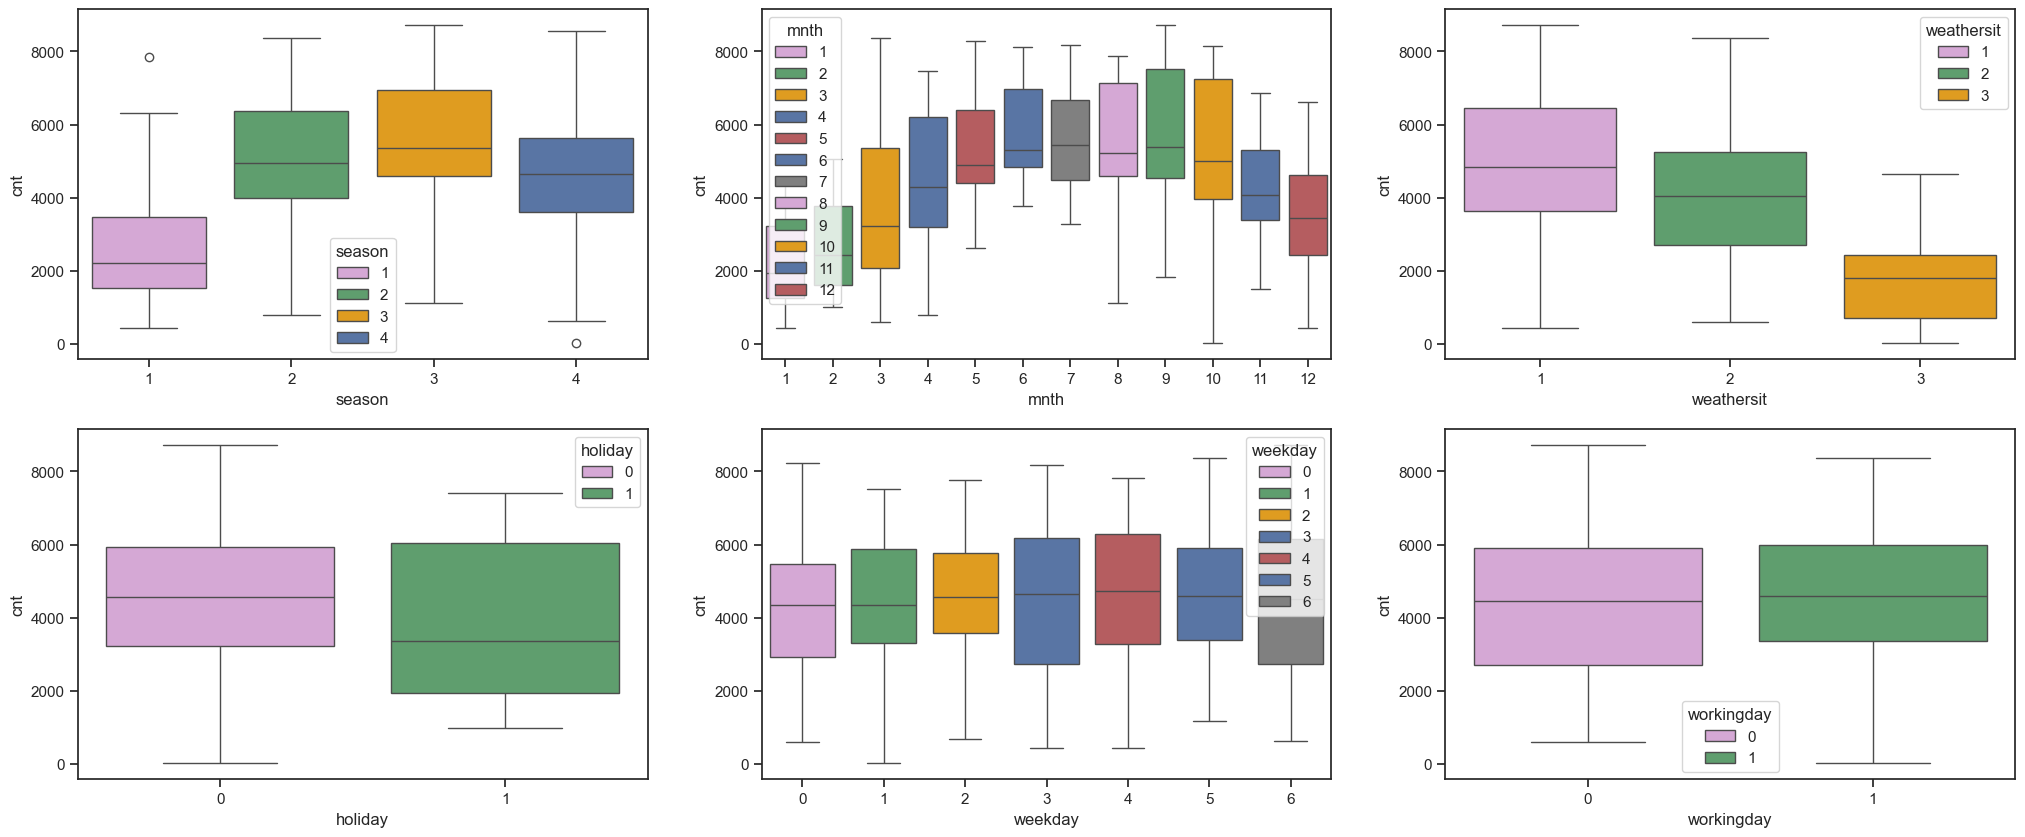

In [630]:
palette = ['plum', 'g', 'orange', 'b', 'r', 'b', 'gray']

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', hue = 'season', y = 'cnt', data = df, palette=palette, legend=True)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', hue = 'mnth', y = 'cnt', data = df, palette=palette, legend=True)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', hue = 'weathersit', y = 'cnt', data = df, palette=palette, legend=True)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', hue = 'holiday', y = 'cnt', data = df, palette=palette, legend=True)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', hue = 'weekday', y = 'cnt', data = df, palette=palette, legend=True)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', hue = 'workingday', y = 'cnt', data = df, palette=palette, legend=True)
plt.show()

### insight based on the above sub plots
###### 1. Season seem to have good variation, where season 1 seems to have very less booking with median around 2000 against other seasons which has median around 5000, it will have an impact on total bookings cut variable
###### 2. month also have a good variation, where season6,7,8 ,9, 10 have around 5000 and surely shows some impact on the total bookings cnt variable
###### 3. weathersit also have a good variation across all 3 categories and median changing from 2000 to 4000 to 5000, will have a decent effect on total bookings cnt
###### 4. weekday seems to be having similar median booking across all days and seems to have no to less effect on total bookings
###### 5. workingday seems to be having similar median booking across 2 categories and seems to have no to less effect on total bookings



<Axes: >

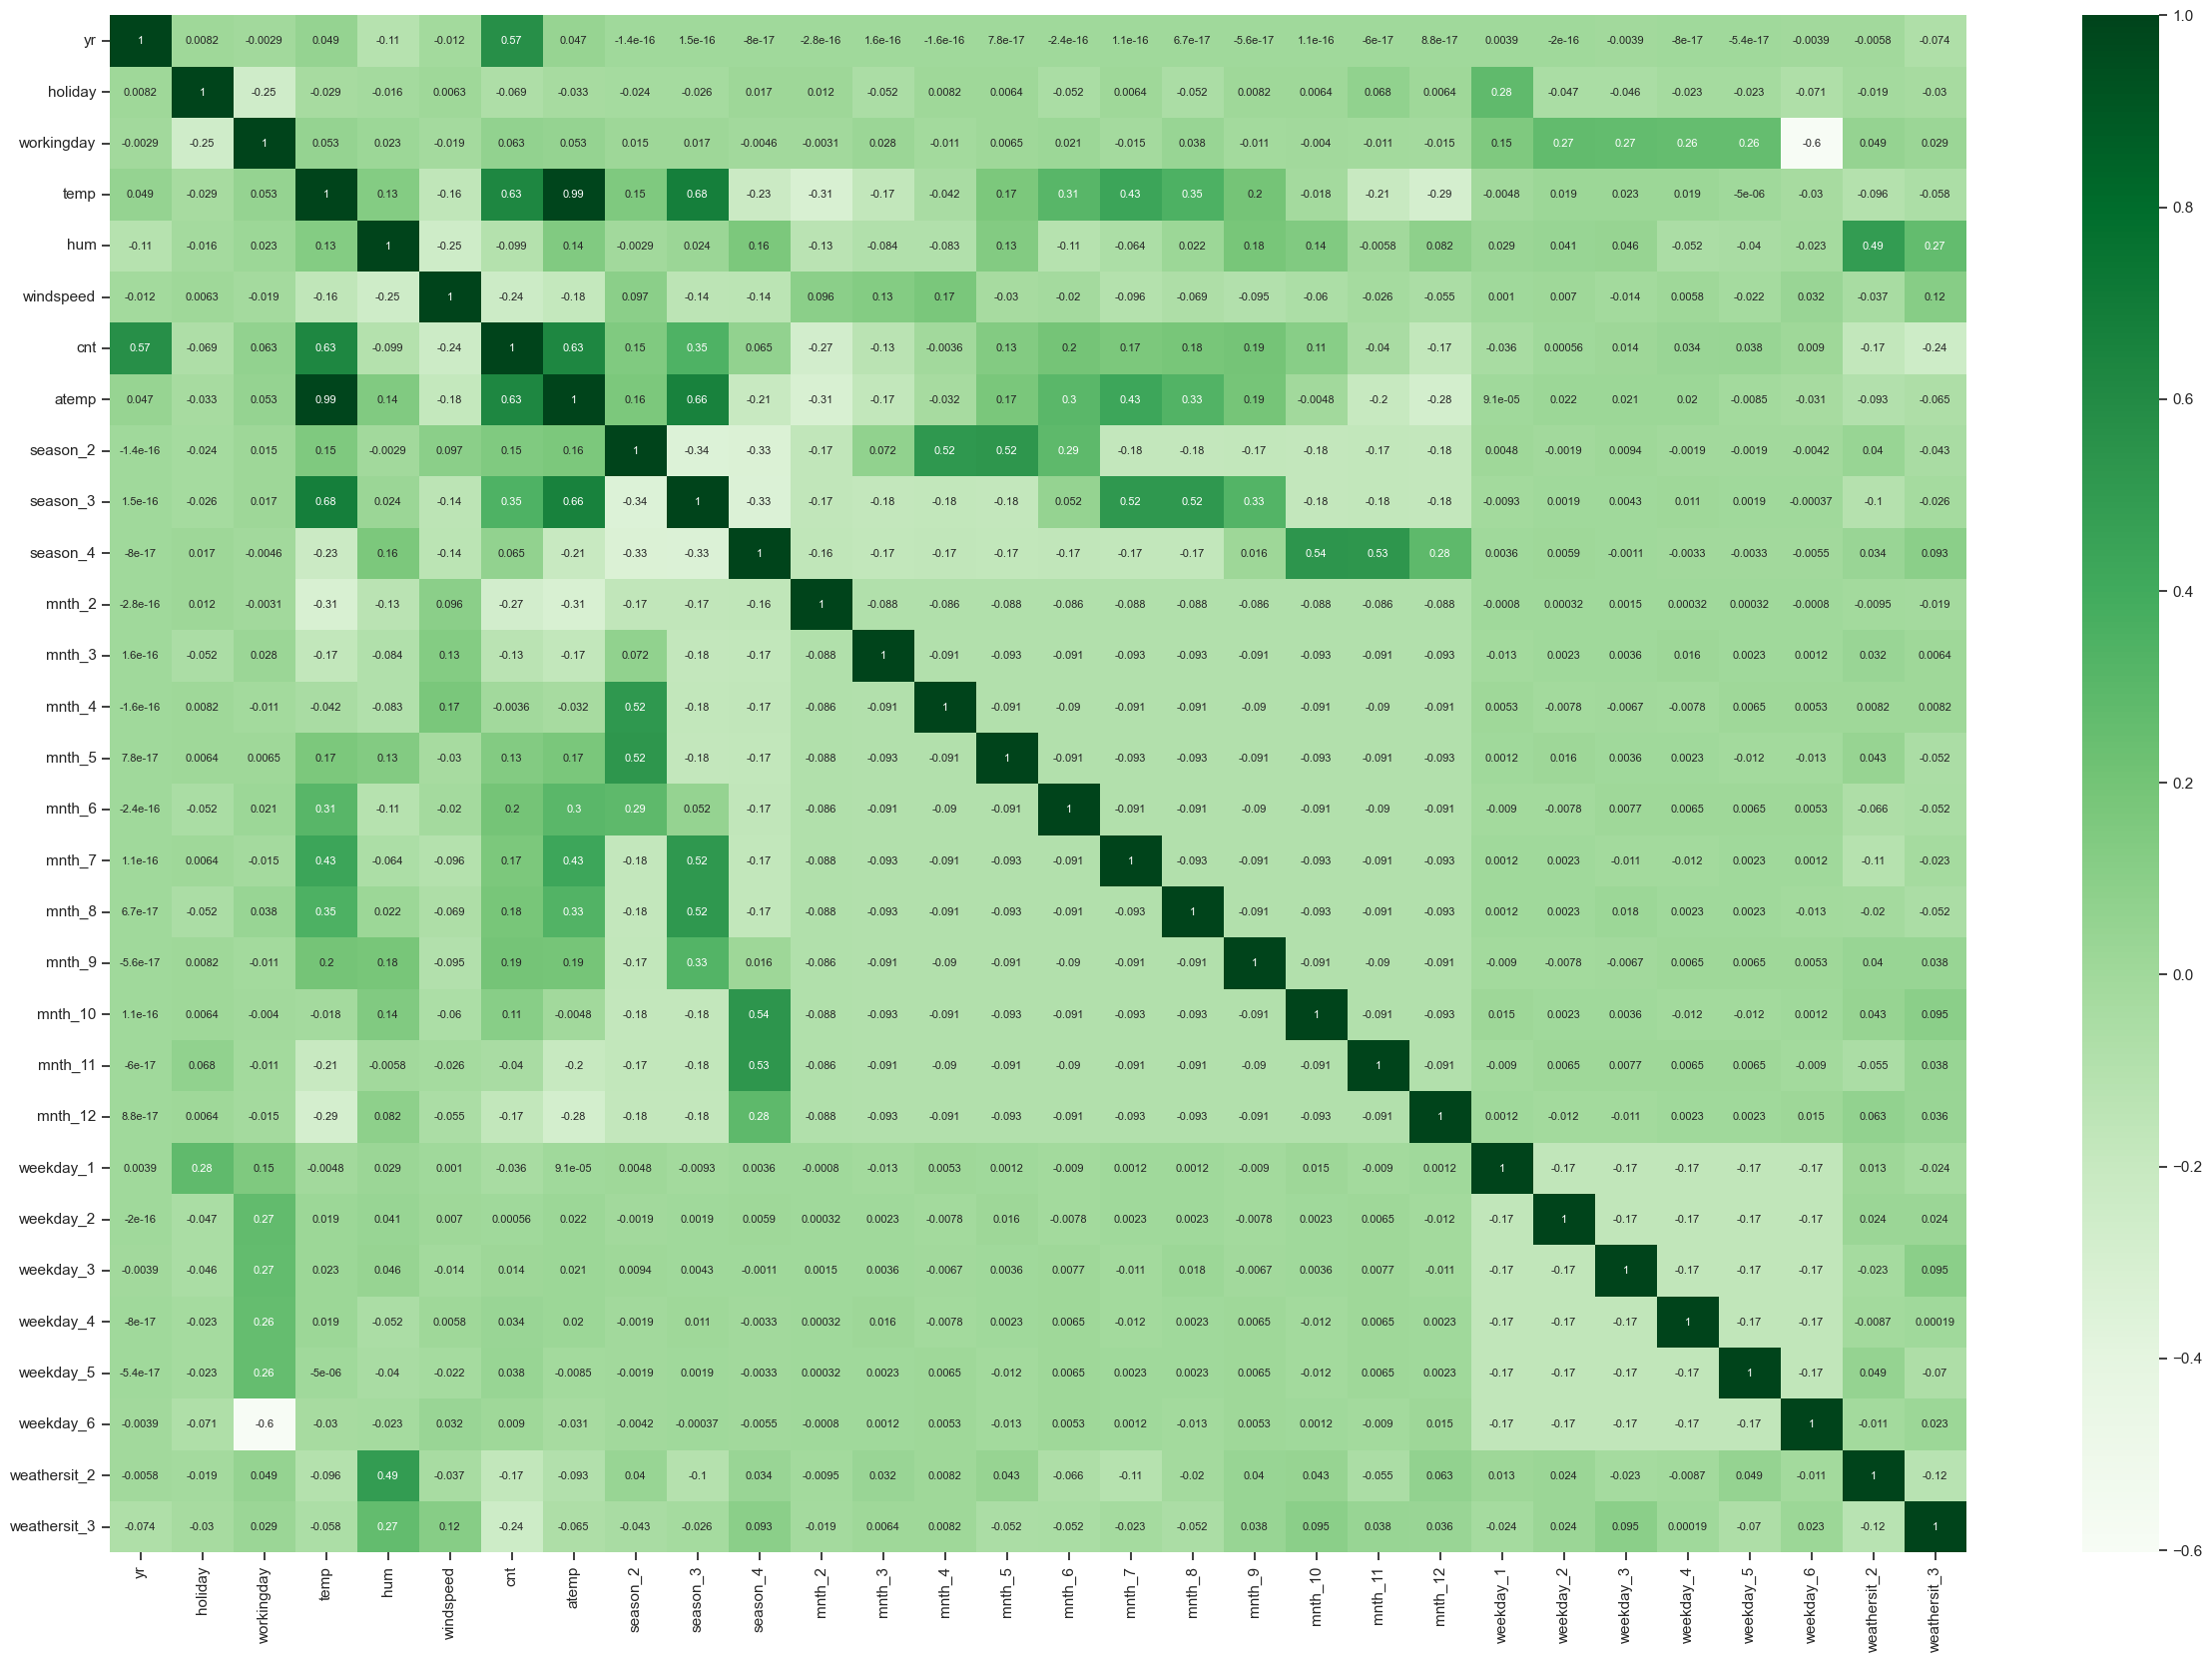

In [631]:
plt.figure(figsize = (30,20))
sns.heatmap(df_copy.corr(), annot=True, cmap="Greens", annot_kws={"fontsize":8})


#### the above correlation heatmap shows good indication of multicolnearity, we shall check this heatmap while removing the variables from out model to optomise the model outcomes along with P value and VIF

## RESCALING THE FEATURES

In [632]:
scaler = MinMaxScaler()
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,atemp,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
726,1,0,1,10.386653,59.0000,10.416557,3095,12.75230,0,0,...,0,1,0,0,0,0,1,0,1,0
589,1,0,1,29.554153,54.5417,9.126204,6883,33.11270,0,1,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,13.735000,44.9583,20.624811,2134,16.00355,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,1,22.515847,69.0000,10.166714,4539,26.48375,0,1,...,0,0,1,0,0,0,0,0,1,0
608,1,0,0,30.886653,63.8333,7.583529,6140,35.13270,0,1,...,0,0,0,0,0,0,0,1,1,0


In [633]:
# applying the scaler to num variables
number_vars = ['temp', 'hum', 'atemp', 'windspeed','cnt']
df_train[number_vars] = scaler.fit_transform(df_train[number_vars])

In [634]:
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,atemp,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
726,1,0,1,0.204943,0.612987,0.274350,0.321623,0.210505,0,0,...,0,1,0,0,0,0,1,0,1,0
589,1,0,1,0.815938,0.566667,0.234647,0.778945,0.759261,0,1,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0.205602,0.298133,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0.495956,0.580597,0,1,...,0,0,1,0,0,0,0,0,1,0
608,1,0,0,0.858414,0.663203,0.187179,0.689243,0.813704,0,1,...,0,0,0,0,0,0,0,1,1,0


## building the linear model

In [635]:
# creating X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

In [636]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,atemp,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
726,1,0,1,0.204943,0.612987,0.274350,0.210505,0,0,0,...,0,1,0,0,0,0,1,0,1,0
589,1,0,1,0.815938,0.566667,0.234647,0.759261,0,1,0,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0.298133,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0.580597,0,1,0,...,0,0,1,0,0,0,0,0,1,0
608,1,0,0,0.858414,0.663203,0.187179,0.813704,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,0.407519,0.729437,0.235894,0.413825,0,0,1,...,1,0,0,0,0,1,0,0,0,0
496,1,0,0,0.611185,0.499135,0.207683,0.601002,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25,0,0,1,0.158112,0.896104,0.559626,0.141176,0,0,0,...,0,0,0,0,1,0,0,0,0,1
507,1,0,1,0.686334,0.804762,0.164117,0.654630,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [637]:
# we apply the RFE and choose 15 top variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [638]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('atemp', False, 13),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 14),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 11),
 ('mnth_12', False, 15),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [639]:
# let's select all the variables which are RFE suggests, where rfe.support_ is true

In [640]:
rfe_cols = X_train.columns[rfe.support_]

In [641]:
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [642]:
# Creating x_train_rfe dataframe with RFE selected variables (above)
X_train_rfe = X_train[rfe_cols]

In [643]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_3
726,1,0,1,0.204943,0.612987,0.274350,0,0,0,0,0,0,0,1,0
589,1,0,1,0.815938,0.566667,0.234647,0,0,0,1,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0,0,0,0,0,1,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0,0,1,1,0,0,0,0,0
608,1,0,0,0.858414,0.663203,0.187179,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,0.407519,0.729437,0.235894,0,1,0,0,0,0,1,0,0
496,1,0,0,0.611185,0.499135,0.207683,1,0,0,0,0,0,0,0,0
25,0,0,1,0.158112,0.896104,0.559626,0,0,0,0,0,1,0,0,1
507,1,0,1,0.686334,0.804762,0.164117,1,0,0,0,0,1,0,0,0


## building the model using stats model

In [644]:
def vif_check(df):
       from statsmodels.stats.outliers_influence import variance_inflation_factor
       vif = pd.DataFrame()
       vif['Features'] = df.columns
       vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
       vif['VIF'] = round(vif['VIF'], 2)
       vif = vif.sort_values(by = "VIF", ascending = False)
       print(vif)

## model1

In [645]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model1 = sm.OLS(y_train, X_train_lm1).fit()

In [646]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.05e-175
Time:                        00:33:45   Log-Likelihood:                 461.45
No. Observations:                 510   AIC:                            -892.9
Df Residuals:                     495   BIC:                            -829.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2344      0.030      7.885   

In [647]:
# vif check
vif_check(X_train_rfe)

        Features    VIF
1        holiday    inf
2     workingday    inf
9      weekday_1    inf
10     weekday_2    inf
11     weekday_3    inf
12     weekday_4    inf
13     weekday_5    inf
4            hum  10.63
3           temp   5.96
5      windspeed   4.11
0             yr   1.93
6       season_2   1.62
7       season_4   1.59
8         mnth_9   1.21
14  weathersit_3   1.11


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



##### now lots of columns has got inf value for the vif which is extreme high and shows co linearity, we can start dropping them 1 by 1, 'weekday_3' has high vif value and high p value both, so let's drop this



## model2

In [648]:
X_train_new = X_train_rfe.drop(["weekday_3"], axis = 1)

# rebuild the second model
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
model2 = sm.OLS(y_train, X_train_lm2).fit()

In [649]:
vif_check(X_train_new)


        Features    VIF
4            hum  10.63
2     workingday   7.06
3           temp   5.96
5      windspeed   4.11
9      weekday_1   2.13
10     weekday_2   1.99
0             yr   1.93
11     weekday_4   1.91
12     weekday_5   1.89
6       season_2   1.62
7       season_4   1.59
1        holiday   1.46
8         mnth_9   1.21
13  weathersit_3   1.11


In [650]:
# summary of the model2
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.05e-175
Time:                        00:33:45   Log-Likelihood:                 461.45
No. Observations:                 510   AIC:                            -892.9
Df Residuals:                     495   BIC:                            -829.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2344      0.030      7.885   

#### based on the above summary we can see weekday_5  has high p value, so let's drop it

## model3

In [651]:
X_train_new = X_train_new.drop(["weekday_5"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
model3 = sm.OLS(y_train, X_train_lm3).fit()


In [652]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     177.1
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          8.37e-177
Time:                        00:33:45   Log-Likelihood:                 461.37
No. Observations:                 510   AIC:                            -894.7
Df Residuals:                     496   BIC:                            -835.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2346      0.030      7.904   

In [653]:
vif_check(X_train_new)


        Features    VIF
4            hum  10.63
3           temp   5.95
2     workingday   4.85
5      windspeed   4.11
0             yr   1.93
9      weekday_1   1.66
6       season_2   1.62
7       season_4   1.59
10     weekday_2   1.53
11     weekday_4   1.49
1        holiday   1.35
8         mnth_9   1.21
12  weathersit_3   1.09


#### based on the above summary we can see weekday_4  has high p value, so let's drop it


## model4

In [654]:
X_train_new = X_train_new.drop(["weekday_4"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
model4 = sm.OLS(y_train, X_train_lm4).fit()


In [655]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.8
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          9.33e-178
Time:                        00:33:45   Log-Likelihood:                 460.90
No. Observations:                 510   AIC:                            -895.8
Df Residuals:                     497   BIC:                            -840.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2325      0.030      7.854   

In [656]:
vif_check(X_train_new)

        Features    VIF
4            hum  10.61
3           temp   5.94
5      windspeed   4.11
2     workingday   4.00
0             yr   1.93
6       season_2   1.62
7       season_4   1.59
9      weekday_1   1.49
10     weekday_2   1.36
1        holiday   1.31
8         mnth_9   1.21
11  weathersit_3   1.09


#### based on the above summary we can see weekday_2  has high p value, so let's drop it


## model5

In [657]:
X_train_new = X_train_new.drop(["weekday_2"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
model5 = sm.OLS(y_train, X_train_lm5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          8.20e-179
Time:                        00:33:45   Log-Likelihood:                 460.63
No. Observations:                 510   AIC:                            -897.3
Df Residuals:                     498   BIC:                            -846.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2333      0.030      7.894   

In [658]:
vif_check(X_train_new)

        Features    VIF
4            hum  10.58
3           temp   5.94
5      windspeed   4.11
2     workingday   3.60
0             yr   1.93
6       season_2   1.62
7       season_4   1.59
9      weekday_1   1.40
1        holiday   1.29
8         mnth_9   1.21
10  weathersit_3   1.09


#### based on the above summary we can see weekday_1  has high p value, so let's drop it


## model6

In [659]:
X_train_new = X_train_new.drop(["weekday_1"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
model6 = sm.OLS(y_train, X_train_lm6).fit()

vif_check(X_train_new)

       Features    VIF
4           hum  10.57
3          temp   5.92
5     windspeed   4.10
2    workingday   3.38
0            yr   1.93
6      season_2   1.61
7      season_4   1.59
8        mnth_9   1.21
1       holiday   1.12
9  weathersit_3   1.09


In [660]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          9.68e-180
Time:                        00:33:45   Log-Likelihood:                 460.00
No. Observations:                 510   AIC:                            -898.0
Df Residuals:                     499   BIC:                            -851.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2333      0.030      7.890   

In [661]:
# based on the above vif data and model5 summary we can see weekday_2 has low vif and high p value, so let's drop it
vif_check(X_train_new)

       Features    VIF
4           hum  10.57
3          temp   5.92
5     windspeed   4.10
2    workingday   3.38
0            yr   1.93
6      season_2   1.61
7      season_4   1.59
8        mnth_9   1.21
1       holiday   1.12
9  weathersit_3   1.09


#### based on the above summary we can see workingday  has high p value, so let's drop it


## model7

In [662]:
X_train_new = X_train_new.drop(["workingday"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
model7 = sm.OLS(y_train, X_train_lm7).fit()


In [663]:
print(model7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.35e-180
Time:                        00:33:45   Log-Likelihood:                 459.15
No. Observations:                 510   AIC:                            -898.3
Df Residuals:                     500   BIC:                            -856.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2414      0.029      8.349   

#### based on the above summary we can see hum has high VIF value, so let's drop it


In [664]:
# based on the above vif data and model5 summary we can see weekday_1 has low vif and high p value, so let's drop it
vif_check(X_train_new)

       Features   VIF
3           hum  9.42
2          temp  5.87
4     windspeed  4.03
0            yr  1.92
5      season_2  1.61
6      season_4  1.59
7        mnth_9  1.20
8  weathersit_3  1.09
1       holiday  1.04


## model8

In [665]:
X_train_new = X_train_new.drop(["hum"], axis=1)

# rebuild the second model
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
model8 = sm.OLS(y_train, X_train_lm8).fit()

In [666]:
print(model8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          9.98e-168
Time:                        00:33:45   Log-Likelihood:                 425.98
No. Observations:                 510   AIC:                            -834.0
Df Residuals:                     501   BIC:                            -795.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0485      0.018      2.627   

In [667]:
vif_check(X_train_new)

       Features   VIF
2          temp  3.54
3     windspeed  3.09
0            yr  1.89
4      season_2  1.57
5      season_4  1.34
6        mnth_9  1.19
7  weathersit_3  1.06
1       holiday  1.03


#### insight - based on the above all vif values all lesser than 5, we can conclude that there is no multi colinearity between predictor variables.

#### validating the assumptions
#### 1. Error terms are normally distributed with mean zero (not X, Y)
##### Residual Analysis Of Training Data

In [668]:
y_train_pred = model8.predict(X_train_lm8)
res = y_train-y_train_pred


<Figure size 640x480 with 0 Axes>

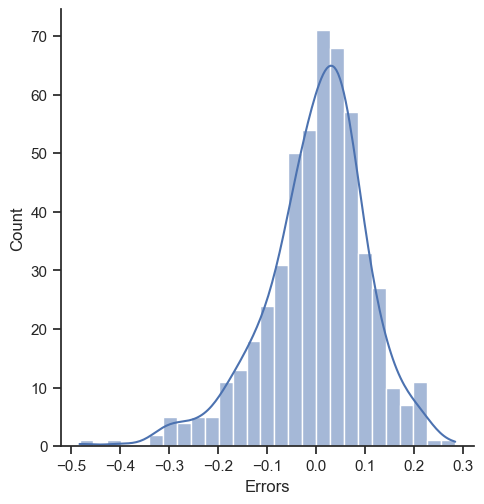

In [669]:
fig = plt.figure()
sns.displot((res), kde=True)
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')  
plt.show()

#### Insight - From the above histogram, we can conclude that Residuals are normally distributed. Hence the assumption for Linear Regression is valid


## making the predictions

In [670]:
#Applying the scaling on the test sets
number_vars = ['temp', 'hum', 'atemp', 'windspeed','cnt']
df_test[number_vars] = scaler.transform(df_test[number_vars])

In [671]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,atemp,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
82,0,0,1,0.246330,0.837229,0.456418,0.173126,0.231780,1,0,...,0,0,0,0,0,1,0,0,1,0
272,0,0,1,0.611185,0.672727,0.379497,0.575999,0.601018,0,0,...,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0.323658,0.837229,0.284606,0.066884,0.356827,0,0,...,0,0,0,0,0,0,0,1,1,0
648,1,0,1,0.442371,0.481385,0.328208,0.861886,0.447847,0,0,...,0,0,0,0,0,1,0,0,0,0
437,1,0,1,0.622076,0.526839,0.191045,0.710008,0.606123,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1,0,0,0.491382,0.841558,0.215414,0.659302,0.492093,0,0,...,0,0,0,0,0,0,0,0,1,0
625,1,0,1,0.688511,0.906494,0.691023,0.439696,0.628291,0,1,...,0,0,0,1,0,0,0,0,1,0
42,0,0,0,0.164646,0.565368,0.373090,0.125679,0.180734,0,0,...,0,0,0,0,0,0,0,1,0,0
679,1,0,0,0.423856,0.684849,0.216686,0.775202,0.435107,0,0,...,1,0,0,0,0,0,0,0,0,0


In [672]:
# dividing X and y test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 82 to 674
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   atemp         219 non-null    float64
 7   season_2      219 non-null    int64  
 8   season_3      219 non-null    int64  
 9   season_4      219 non-null    int64  
 10  mnth_2        219 non-null    int64  
 11  mnth_3        219 non-null    int64  
 12  mnth_4        219 non-null    int64  
 13  mnth_5        219 non-null    int64  
 14  mnth_6        219 non-null    int64  
 15  mnth_7        219 non-null    int64  
 16  mnth_8        219 non-null    int64  
 17  mnth_9        219 non-null    int64  
 18  mnth_10       219 non-null    int6

In [673]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 82 to 674
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    int64  
 6   season_4      219 non-null    int64  
 7   mnth_9        219 non-null    int64  
 8   weathersit_3  219 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 17.1 KB


In [674]:
# Making predictions using the final model (lr6)
y_pred = model8.predict(X_test_lm8)

In [675]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7907828905263606

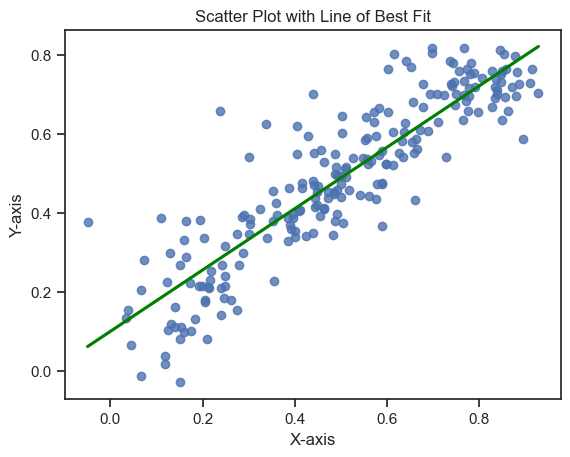

In [676]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "green"})
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Line of Best Fit')
plt.show()

In [678]:
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1- r2_score(y_test, y_pred) )*(n-1)/(n-p-1)

print('train R-squared', 0.796)
print('train Adj. R-squared',0.793)
print('---------------')
print('test R-squared', r2_score(y_test, y_pred))
print('test Adj. R-squared', adjusted_r2)

train R-squared 0.796
train Adj. R-squared 0.793
---------------
test R-squared 0.7907828905263606
test Adj. R-squared 0.7828127149273649
